# Visualisering av flater i 3D

Vi skal plotte flater i tredimensjonal rom. 
Først må vi importerer programpakker

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

## Flater som er grafer

Først begynner vi med en flate som er graf til en funksjon $f(x,y)$.
Ideen er som vanlig at vi lager en meshgrid for å evaluere funksjonen.

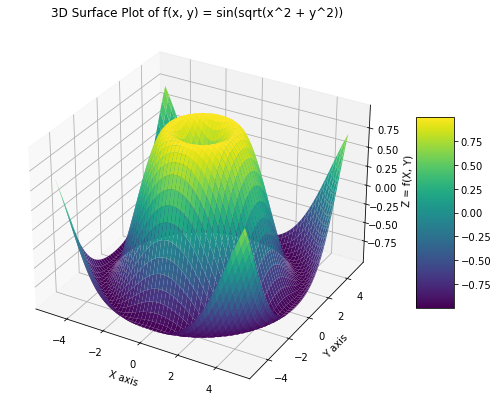

In [6]:

# Define the function
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z = f(X, Y)')
ax.set_title('3D Surface Plot of f(x, y) = sin(sqrt(x^2 + y^2))')

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

## Tangent vektor for en kurve med verdier på flaten

Vi jobber videre med flaten fra siste eksemple. La oss se på en kurve på flaten og tangentvektoren i et punkt.

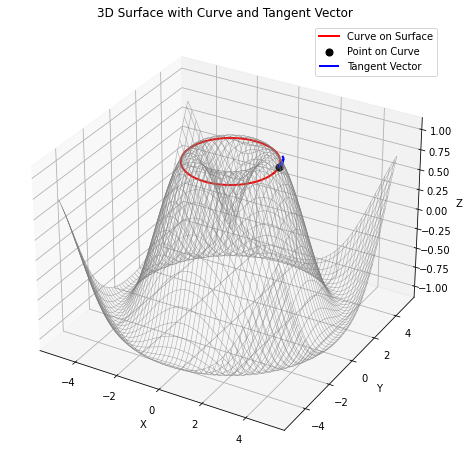

In [ ]:
# Definer kurven i xy-planet
def x(t):
    return 2 * np.cos(t)

def y(t):
    return 2 * np.sin(t)

def zkurve(t):
    return f(x(t), y(t))

# Parameter for the curve
t_vals = np.linspace(0, 2 * np.pi, 200)

# Curve points
x_vals = x(t_vals)
y_vals = y(t_vals)
z_vals = zkurve(t_vals)

# Velg punkt på kurven (f.eks., at t = π/4)
t0 = 1 / 4
x0 = x(t0)
y0 = y(t0)
z0 = zkurve(t0)

# Lag tilnærming til tangent vector (sentral differanse ved t0)
dt = 1e-5
dx_dt = (x(t0 + dt) - x(t0 - dt)) / (2 * dt)
dy_dt = (y(t0 + dt) - y(t0 - dt)) / (2 * dt)
dz_dt = (zkurve(t0 + dt) - zkurve(t0 - dt)) / (2 * dt)

# Normalize tangent vector
norm = np.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)
tx, ty, tz = dx_dt / norm, dy_dt / norm, dz_dt / norm

# Create mesh grid for the surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot flate (vi bruker wireframe)
surf = ax.plot_wireframe(X, Y, Z, color='gray', linewidth=0.5, alpha=0.7)

# Plot curve
ax.plot(x_vals, y_vals, z_vals, color='red', linewidth=2, label='Curve on Surface')

# Plot point on the curve
ax.scatter(x0, y0, z0, color='black', s=50, label='Point on Curve')

# Plot tangent vector at the point
ax.quiver(x0, y0, z0, tx, ty, tz, length=0.8, color='blue', linewidth=2, label='Tangent Vector')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Flate med kurve og dens tangent Vektor')
ax.legend()

plt.show()

# Plot en flate gitt ved en parametrisering 

Vi anta at flaten er gitt ved hjelp av en parametrisering

$$\vec{r}(x,y)=P(x,y)\vec{i}+Q(x,y)\vec{j}+R(x,y)\vec{k}$$

Følgende kode plotter flaten.

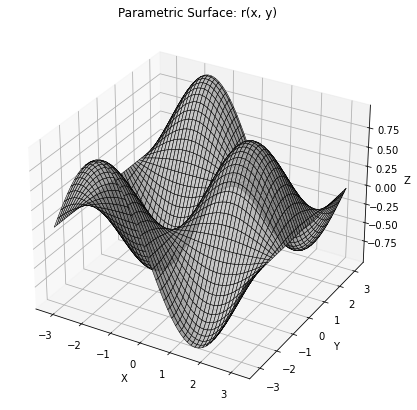

In [11]:
# Define the parametric surface r(x, y) = [X(x,y), Y(x,y), Z(x,y)]
def r(x, y):
    P = x
    Q = y
    R = np.sin(x) * np.cos(y)  # Example: wavy surface
    return P, Q, R

# Create a grid over the parameter domain
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(-np.pi, np.pi, 100)
U, V = np.meshgrid(u, v)

# Evaluate the vector function r(x, y) on the grid
X, Y, Z = r(U, V)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, color='lightgray', edgecolor='black', alpha=0.8, linewidth=0.5)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Parametric Surface: r(x, y)')

plt.show()